<h1><span style="color:red">Descriptive Statistics for Numeric Variables</span></h1>

This sample notebook reads numeric variables from survey dataset and computes several descriptive statistics

## 1. Setup

<p><span style="color:red">The code below must be uncommented and run</span></p>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!rm -rf myclone
!git clone --depth 1 "https://github.com/SteveLamont/Suave_on_Colab.git" myclone

Cloning into 'myclone'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 81 (delta 18), reused 57 (delta 12), pack-reused 0
Unpacking objects: 100% (81/81), 565.32 KiB | 5.89 MiB/s, done.


In [6]:
%cd /content/myclone/helpers
!git pull

/content/myclone/helpers
Already up to date.


In [5]:
print("user = " + str(user))
print("survey_url = " + str(survey_url))
print("views = " + str(views))
print("view = " + str(view))
print("csv_file = " + str(csv_file))
print("dzc_file = " + str(dzc_file))
print("params = " + str(params))
print("active_object = " + str(active_object))
print("full_notebook_url = " + str(full_notebook_url))

user = zaslavsk
survey_url = https://suave-dev.sdsc.edu/main/file=zaslavsk_WBDH_Participants.csv
views = 1110101
view = grid
csv_file = zaslavsk_WBDH_Participants.csv
dzc_file = https://maxim.ucsd.edu/dzgen/lib-staging-uploads/063044157874ce7d5841c906fa6d8073/content.dzc
params = none
active_object = null
full_notebook_url = https://colab.research.google.com/drive/1aZCpg7UmG0nPUuRPTH2p5Nm43G0HmtQg?survey_url=https://suave-dev.sdsc.edu/main/file=zaslavsk_WBDH_Participants.csv&views=1110101&view=grid&user=zaslavsk&csv_file=zaslavsk_WBDH_Participants.csv&params=none&dzc_file=https://maxim.ucsd.edu/dzgen/lib-staging-uploads/063044157874ce7d5841c906fa6d8073/content.dzc&active_object=null


In [9]:
# common imports
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import Markdown, display

import pandas as pd
pd.set_option('display.max_colwidth', 0)
    
import numpy as np
import panel as pn

def printmd(string):
    display(Markdown(string))

absolutePath = "/content/drive/MyDrive/suave/"

# local imports
import sys
sys.path.insert(1, '../../helpers')
import panel_libs as panellibs
import suave_integration as suaveint

# specific imports
import math
import matplotlib.pyplot as plt
import seaborn as sb
# from sklearn.linear_model import LinearRegression
import os



## 2. Read the survey file and extract numeric variables

In [10]:
# read the csv file
df = panellibs.extract_data(absolutePath + csv_file)# print(absolutePath + csv_file)

# create a list of variable names
variables_df = pd.DataFrame({'varname':df.columns})
printmd("<b><span style='color:red'>All variables in the survey file:</span></b>")
print(variables_df.varname.values)

# create a dictionary of #number variables with abbreviated and full variable names 
var_list = {n[:n.index('#')]:n for n in variables_df.varname.values if '#number' in n}
printmd("<b><span style='color:red'>Numeric variables:</span></b>")
for key, value in var_list.items():
    print(key, ' : ', value)

#create a dataframe of only #number variables
nums_df = df[[n for n in variables_df.varname.values if '#number' in n]]


<b><span style='color:red'>All variables in the survey file:</span></b>

['Full Name#hidden' 'Last Name' 'First Name' 'Gender' 'Instituion'
 'Phone Number#hidden' 'Contact Title#hidden' 'EmailAddress#hidden'
 'Social Media/Personal Website#link#hidden'
 'Project Information/Links#link#hidden' 'Focus Areas' 'Specialty'
 'Example Current Project#hidden' 'Other Info' '#img' '#name' '#href'
 'Project Images#multi#hidden' 'Latitude#number#hidden'
 'Longitude#number#hidden']


<b><span style='color:red'>Numeric variables:</span></b>

Latitude  :  Latitude#number#hidden
Longitude  :  Longitude#number#hidden


## 3. Matrix of scatterplots

- Select variables for the scatterplots in the first cell
- Generate the scatterplots in the second cell

In [11]:
# Coerce #number variables that aren't numeric, to be numeric, if possible
for i in list(nums_df):
    pd.to_numeric(i, errors='coerce')


In [12]:
# Examine the dataframe
with pd.option_context("display.max_columns", None):
    display(nums_df)


,Latitude#number#hidden,Longitude#number#hidden
0,37.871899,-122.25854
1,32.884439,-117.23965
2,47.653367,-122.311785
3,37.871899,-122.25854
4,37.090240,-95.712891
...,...,...
317,32.880060,-117.234013
318,33.065138,-117.2540447
319,40.713973,-74.0331831
320,39.733625,-105.0573563


In [13]:
# 3.1 Choose variables for scattermatrix

#creating widgets
wlist = []
i = 0

while i < 5 and i < len(var_list):
    wlist.append(widgets.Dropdown(options=var_list.keys(), value = list(var_list.keys())[i], description = str(i+1) + ":"))
    i += 1
  
printmd("<b><span style='color:red'>Select variables for scatter matrix plotting, then run the next cell</span></b>")

for n in wlist:
    display(n)

<b><span style='color:red'>Select variables for scatter matrix plotting, then run the next cell</span></b>

Dropdown(description='1:', options=('Latitude', 'Longitude'), value='Latitude')

Dropdown(description='2:', index=1, options=('Latitude', 'Longitude'), value='Longitude')

<b><span style='color:red'>Non-numeric or singular variables excluded: </span></b>Longitude#number#hidden

count     303       
unique    200       
top       -95.712891
freq      22        
Name: Longitude#number#hidden, dtype: object


<br><b><span style='color:red'>Scatter matrix for the selected numeric variables</span></b>

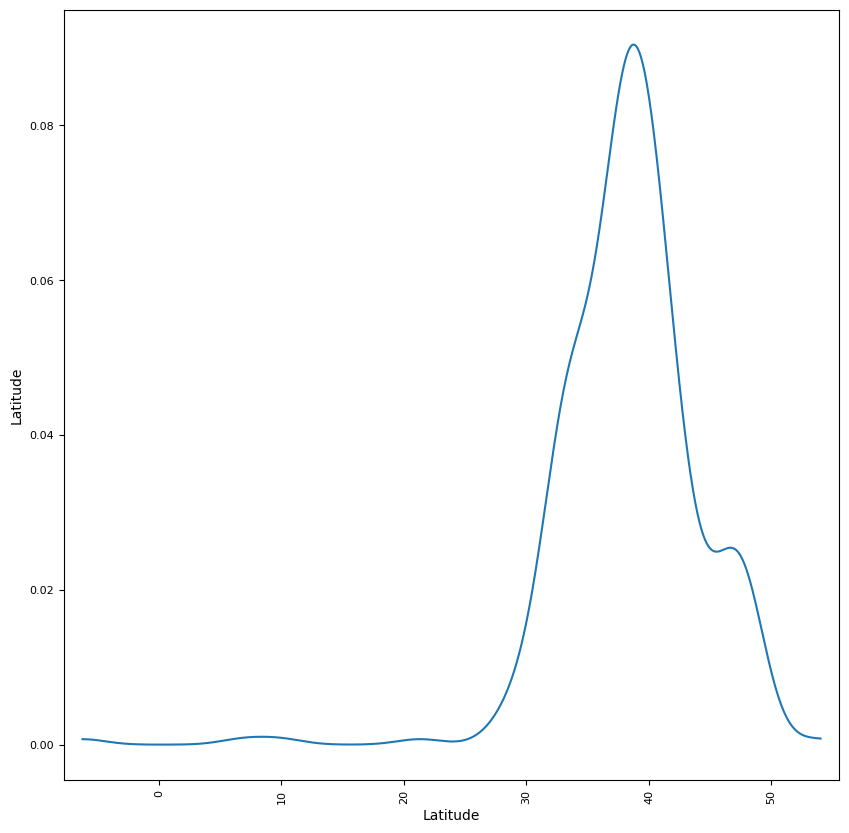

In [14]:
# 3.2 Create the scattermatrix

#scattermatrix
scat_df = df[[var_list[n.value] for n in wlist]]

#check if all variables are different
if len(list(scat_df)) != scat_df.columns.nunique():
    printmd("<b><span style='color:red'>Make sure all selected variables are different, then rerun this cell</span></b>")
else:
    
    # keep only variables that are really numeric
    scat2_df = scat_df.select_dtypes(include=[np.number])
    for col in scat2_df.columns:
#         print(col+"   "+ str(scat2_df[col].nunique()))
        if scat2_df[col].nunique() < 2:
            scat2_df.drop(col, axis=1, inplace=True)

#     for col in scat_df.columns:
#         print(col+"   "+ str(scat_df[col].nunique()))

    # which columns were excluded:
    for item in list(set(list(scat_df.columns)) - set(scat2_df.columns)):
        printmd("<b><span style='color:red'>Non-numeric or singular variables excluded: </span></b>" + item)
        print(scat_df[item].describe())

    w2dict = {n[:n.index('#')]:n for n in scat2_df.columns}
    w2list = list(w2dict.keys())
    
    #plot
    printmd("<br><b><span style='color:red'>Scatter matrix for the selected numeric variables</span></b>")
    wot = pd.plotting.scatter_matrix(scat2_df, alpha=0.2, figsize=(10, 10), diagonal='kde')
    #axis
    for n in range(len(wot)):
        for j in range(len(wot)):
            ax = wot[n, j]
            ax.set(xlabel=w2list[j], ylabel=w2list[n])



## 4. Scatterplot and linear regression

- Select variables for the regression in the first cell
- Generate the plot in the second cell

In [15]:
# 4.1 Choose the variables for the scatterplot

#creating widgets
a4 = widgets.Dropdown(options=var_list.keys(), value = list(var_list.keys())[0], description = "x:")
b4 = widgets.Dropdown(options=var_list.keys(), value = list(var_list.keys())[1], description = "y:")
ui = widgets.VBox([a4, b4])
def f4(a, b):
    return ((a, b))

printmd("<b><span style='color:red'>Select x and y variables for plotting, then run the next cell</span></b>")

formula = widgets.interactive_output(f4, {'a': a4, 'b': b4})

display(ui, formula)


<b><span style='color:red'>Select x and y variables for plotting, then run the next cell</span></b>

Output()

In [16]:
var_list[a4.value]

'Latitude#number#hidden'

In [17]:
# 4.2 Create the scatterplot and regression line

from pandas.api.types import is_numeric_dtype

x4 = df[var_list[a4.value]].tolist()
y4 = df[var_list[b4.value]].tolist()

if not is_numeric_dtype(df[var_list[a4.value]]):
    printmd("<b><span style='color:red'>"+ var_list[a4.value] + " is not numeric. Cannot plot.</span></b>")
    print(df[var_list[a4.value]].describe())

if not is_numeric_dtype(df[var_list[b4.value]]):
    printmd("<b><span style='color:red'>"+ var_list[b4.value] + " is not numeric. Cannot plot.</span></b>")
    print(df[var_list[b4.value]].describe())

if is_numeric_dtype(df[var_list[b4.value]]) and is_numeric_dtype(df[var_list[a4.value]]):

# check if variables different
    if a4.value == b4.value:
        printmd("<b><span style='color:red'>Make sure the selected variables are different, then rerun this cell</span></b>")

    else:
        try:
            printmd("<b><span style='color:red'><br>Scatterplot with regression line and confidence intervals:</span></b>")
            ax = sb.regplot(x=var_list[a4.value], y=var_list[b4.value], data=df, scatter_kws={"s": 20, "color" : "red", "alpha" : 0.2})
            #axis
            ax.set(xlabel=a4.value, ylabel=b4.value)
            plt.show()
        except:
            printmd("<b><span style='color:red'>Cannot plot. One or both variables contain non-numeric values!!</span></b>")



<b><span style='color:red'>Longitude#number#hidden is not numeric. Cannot plot.</span></b>

count     303       
unique    200       
top       -95.712891
freq      22        
Name: Longitude#number#hidden, dtype: object


## 5. Mean, standard deviation, skew, etc...

- Select a variable in the first cell
- Generate statistics in the second cell

In [18]:
# 5.2 Choose the variable to calculate descriptive statistics

# creating widgets
a5 = widgets.Dropdown(options=var_list.keys(), description = "Variable:")
ui = widgets.VBox([a5])
def f5(a):
    return (a)

printmd("<b><span style='color:red'><br>Select variable for descriptive statistics, then run the next cell</span></b>")

formula = widgets.interactive_output(f5, {'a': a5})

display(ui, formula)

<b><span style='color:red'><br>Select variable for descriptive statistics, then run the next cell</span></b>

Output()

Mean of variable   : 38.37990467227723
Standard deviation : 5.867374152014173
Variance           : 34.426079439724035
Skew               : -2.152402801456313
Histogram          :


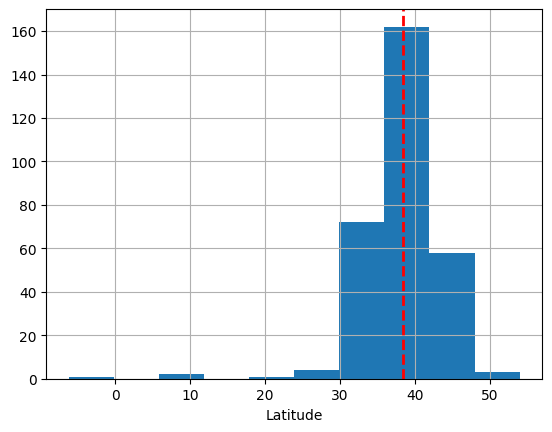

In [19]:
# 5.2 Show the descriptive statistics

try:
    # calculating descriptive stats
    var = df[var_list[a5.value]]
    vmean = var.mean()
    vsd = var.std()
    vskew = var.skew()
    vvar = var.var()

    # printing descriptive stats
    print("Mean of variable   : " + str(vmean))
    print("Standard deviation : " + str(vsd))
    print("Variance           : " + str(vvar))
    print("Skew               : " + str(vskew))

    # plot
    print("Histogram          :")
    ax = var.hist()
    # axis
    ax.set(xlabel=a5.value)
    noout = plt.axvline(vmean, color='red', linestyle='dashed', linewidth=2)
except:
    printmd(var_list[a5.value] +"<b><span style='color:red'> contains non-numeric values!! Cannot compute</span></b>")
    print(df[var_list[a5.value]].describe())


## 6. Generate a new statistical variable to add to SuAVE

- select a variable and an operation in the first cell
- edit variable name in the second cell
- compute the new variable in the third cell

In [20]:
# 6.1 Select a variable for processing

a6 = widgets.Dropdown(options=var_list.keys())
b6 = widgets.Dropdown(options=['Number of SDs', 'Abs dist from mean'])
ui = widgets.VBox([a6, b6])
def f6(a, b):
    return ((a, b))

formula = widgets.interactive_output(f6, {'a': a6, 'b': b6})

printmd("<b><span style='color:red'><br>Select a variable and a derivative to create, then run the next cell</span></b>")

display(ui, formula)

<b><span style='color:red'><br>Select a variable and a derivative to create, then run the next cell</span></b>

Output()

In [21]:
# 6.2 Give a name to the new variable

def f62(Var_Name):
    return Var_Name
if b6.value == "Abs dist from mean":
    newvar = interact(f62, Var_Name= "ADFM" + " on " + a6.value +'#number')
elif b6.value == "Number of SDs":
    newvar = interact(f62, Var_Name= "NSD" + " for " + a6.value +'#number')
    
printmd("<b><span style='color:red'>After defining variable name hit Enter, then run the next cell</span></b>")


interactive(children=(Text(value='NSD for Latitude#number', description='Var_Name'), Output()), _dom_classes=(…

<b><span style='color:red'>After defining variable name hit Enter, then run the next cell</span></b>

In [22]:
# 6.3 Compute the new variable and format it for SuAVE

try: 
    mean = df[var_list[a6.value]].mean()
    std = df[var_list[a6.value]].std()

    if b6.value == 'Abs dist from mean':
        df[newvar.widget.result] = [abs(i - mean) if not math.isnan(i) else np.nan for i in df[var_list[a6.value]]]
    elif b6.value == 'Number of SDs':
        df[newvar.widget.result] = [math.ceil(abs(i - mean) / std) if not math.isnan(i) else np.nan for i in df[var_list[a6.value]]]


    # make sure there are no illegal NaN type values in this #number variable
    df[newvar.widget.result].fillna('',inplace=True)
    df[newvar.widget.result] = pd.to_numeric(df[newvar.widget.result], errors='coerce', downcast='float')
    df[newvar.widget.result] = df[newvar.widget.result].apply(lambda x: '{:.6f}'.format(x))
    df.replace(['None', 'nan'], np.nan, inplace=True)
    printmd("<b><span style='color:red'>New variable computed</span></b>")

except:
    printmd(var_list[a6.value] +"<b><span style='color:red'> contains non-numeric values!! Cannot compute</span></b>")
    print(df[var_list[a6.value]].describe())


<b><span style='color:red'>New variable computed</span></b>

## 7. Visualize the resultant dataframe

In [23]:
with pd.option_context("display.max_columns", None):
    if any("geometry" in col for col in df.columns):
        display(df.drop(['geometry'],axis=1))
    else:
        display(df)
    
    

,Full Name#hidden,Last Name,First Name,Gender,Instituion,Phone Number#hidden,Contact Title#hidden,EmailAddress#hidden,Social Media/Personal Website#link#hidden,Project Information/Links#link#hidden,Focus Areas,Specialty,Example Current Project#hidden,Other Info,#img,#name,#href,Project Images#multi#hidden,Latitude#number#hidden,Longitude#number#hidden,NSD for Latitude#number
0,Meredith Lee,Lee,Meredith,Female,UC Berkeley,510-664-4476,Executive Director of WBDIH,mmlee@berkeley.edu,http://twitter.com/mmlee,https://www.linkedin.com/in/mmlee,Metro Data Science,Precision Medicine,Maker Faire,Participated in Transportation Challenge 2017-2018,MeredithLee,Meredith Lee,https://www.linkedin.com/in/mmlee,"<a href=""https://bioregional.ucsd.edu/suave/surveys/WBDHp/Maker1.jpg"" target=""_blank""><img src=""https://bioregional.ucsd.edu/suave/surveys/WBDHp/thumbs/Maker1_tn.jpg"" border=""0""></a>",37.871899,-122.25854,1.000000
1,Christine Kirkpatrick,Kirkpatrick,Christine,Female,SDSC,858-822-3322,Division Director of IT Systems & Services,christine@sdsc.edu,http://twitter.com/SuperChristineK,https://www.linkedin.com/in/kirkpatrickchristine,Data-Enabled Scientific Discovery & Learning,Enterprise Architectures,NaN,NaN,ChristineKirkpatrick,Christine Kirkpatrick,https://www.linkedin.com/in/kirkpatrickchristine,NaN,32.884439,-117.23965,1.000000
2,Sarah Stone,Stone,Sarah,Female,eScience Institute at UW,NaN,eScience Executive Director,manager@escience.washington.edu,http://twitter.com/uwescience,http://escience.washington.edu/people/sarah-stone/,Data-Enabled Scientific Discovery & Learning,Zooplankton Ecology,NaN,Participated in Transportation Challenge 2017-2018,SarahStone,Sarah Stone,http://escience.washington.edu/people/sarah-stone/,NaN,47.653367,-122.311785,2.000000
3,Michael Franklin,Franklin,Michael,Male,UC Berkeley,510-642-1662,"WBDIH Principal Investigator |Professor, University of California Berkeley",franklin@cs.berkeley.edu,http://twitter.com/franklinmj,https://people.eecs.berkeley.edu/~franklin/,Big Data Technology,Data-Enabled Scientific Discovery & Learning,NaN,NaN,MichaelFranklin,Michael Franklin,https://people.eecs.berkeley.edu/~franklin/,NaN,37.871899,-122.25854,1.000000
4,Ed Lazowska,Lazowska,Ed,Male,University of Washington,206-543-4755,"Bill & Melinda Gates Chair in Computer Science & Engineering and eScience Institute Director, University of Washington",lazowskacs.washington.edu,http://twitter.com/lazowska,https://www.cs.washington.edu/people/faculty/lazowska/,Big Data Technology,Computer Systems & Networking,NaN,Participated in Transportation Challenge 2017-2018,EdwardLazowska,Ed Lazowska,https://www.cs.washington.edu/people/faculty/lazowska/,NaN,37.090240,-95.712891,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Nicole Martindale,Martindale,Nicole,Female,UC San Diego,NaN,NaN,mmartind@ucsd.edu,NaN,https://www.linkedin.com/in/nicole-martindale/,Data-Enabled Scientific Discovery & Learning,NaN,NaN,NaN,NicoleMartindale,Nicole Martindale,https://www.linkedin.com/in/nicole-martindale/,NaN,32.880060,-117.234013,1.000000
318,Zachary Posner,Posner,Zachary,Male,Black Diamond Equipment,NaN,VP - Information Technology,zach.posner@bdel.com,NaN,https://www.linkedin.com/in/zach-posner/,Metro Data Science,NaN,NaN,NaN,ZacharyPosner,Zachary Posner,https://www.linkedin.com/in/zach-posner/,NaN,33.065138,-117.2540447,1.000000
319,Mike Jones,Jones,Mike,Male,Goldman Sachs,NaN,Investment Management,mike.jones@gs.com,NaN,https://www.linkedin.com/in/michaelajones3/,Metro Data Science,NaN,NaN,NaN,MikeJones,Mike Jones,https://www.linkedin.com/in/michaelajones3/,NaN,40.713973,-74.0331831,1.000000
320,Michael Culbertson,Culbertson,Michael,Male,Denver Public Schools,NaN,Senior Analyst,culbertson@rmcres.com,NaN,https://www.linkedin.com/in/michaelculbertson/,Metro Data Science,NaN,NaN,NaN,MichaelCulbertson,Michael Culbertson,https://www.linkedin.com/in/michaelculbertson/,NaN,39.733625,-105.0573563,1.0000

## 8. Save the new version of CSV file, and give a name to new survey

In [24]:
new_file = suaveint.save_csv_file(df, absolutePath, csv_file)

<b><span style='color:red'>A new temporary file will be created at: </span></b>

/content/drive/MyDrive/suave/zaslavsk_WBDH_Participants_v1.csv


In [25]:
#Input survey name

from IPython.display import display
input_text = widgets.Text(placeholder='Enter Survey Name...')
output_text = widgets.Text()

def bind_input_to_output(sender):
    output_text.value = input_text.value

# Tell the text input widget to call bind_input_to_output() on submit
input_text.on_submit(bind_input_to_output)

printmd("<b><span style='color:red'>Input survey name here, press Enter, and then run the next cell:</span></b>")
# Display input text box widget for input
display(input_text)

display(output_text)


<b><span style='color:red'>Input survey name here, press Enter, and then run the next cell:</span></b>

Text(value='', placeholder='Enter Survey Name...')

Text(value='')

In [26]:
#Print survey name
survey_name = output_text.value
printmd("<b><span style='color:red'>Survey Name is: </span></b>" + survey_name)

<b><span style='color:red'>Survey Name is: </span></b>

## 9. Generate the survey and create survey URL

In [ ]:
suaveint.create_survey(survey_url,new_file, survey_name, dzc_file, user, csv_file, view, views)